In [1]:
! pip install python-dateutil

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools
import pandas as pd
import math
import random

In [5]:
#Read the index dictionary
#Revert the index 
index_name = 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])

In [6]:
from os import listdir
from os.path import isfile, join
import os
WD = os.getcwd()
mypath = WD + '/data'
file_output = WD + '/'+ 'seqs_index.dict'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}

In [7]:
#a = onlyfiles[0]
#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = WD + '/data/' + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab

step=36 for t=30
step=28 for t=30
step=34 for t=30
step=22 for t=43
step=60 for t=43
step=48 for t=43
step=2 for t=43
step=26 for t=43
step=16 for t=43
step=54 for t=43
step=50 for t=43
step=23 for t=30
step=1 for t=43
step=2 for t=30
step=56 for t=43
step=20 for t=43
step=26 for t=30
step=6 for t=30
step=6 for t=43
step=18 for t=30
step=44 for t=43
step=38 for t=43
step=54 for t=30
step=42 for t=43
step=50 for t=30
step=12 for t=30
step=56 for t=30
step=8 for t=30
step=23 for t=43
step=48 for t=30
step=25 for t=30
step=14 for t=43
step=28 for t=43
step=10 for t=30
step=58 for t=43
step=42 for t=30
step=20 for t=30
step=40 for t=43
step=12 for t=43
step=14 for t=30
step=4 for t=30
step=32 for t=30
step=52 for t=43
step=30 for t=43
step=18 for t=43
step=60 for t=30
step=36 for t=43
step=34 for t=43
step=40 for t=30
step=44 for t=30
step=46 for t=30
step=58 for t=30
step=30 for t=30
step=16 for t=30
step=32 for t=43
step=4 for t=43
step=8 for t=43
step=10 for t=43
step=38 for t=30
step=2

In [8]:
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)


In [41]:
t=30

#Analysis of entropy in each step

n_steps = len(df[t].columns)
h_results = np.zeros((n_steps,4))

box_size_rel = 0.10
box_size = 500
box_number = 30

for n,step in enumerate(df[t].columns):

    column = df[t][step].to_dict()
    index = df[t].index

    desampled = []
    for element in column:
        desampled.append([element for i in range(int(column[element]))])
    desampled = list(itertools.chain(*desampled))
    random.shuffle(desampled)
    
    
    N = len(desampled)
    #box_size = int(box_size_rel * N)
    
    #box_number = int(1 / box_size_rel)
    boxes = {}
    boxes_df = {}
    
    h = np.zeros(box_number)
    
    # Create boxes
    for i in range(box_number):
        boxes[i] = random.choices(desampled, k=box_size)

    
    # Compute entropy for each box 
    for i in range(box_number):
        #df_x = pd.DataFrame([], columns = ['seq'])
        #for j in range(box_number):
        #    if j != i:
        #        df_x = pd.concat([df_x, pd.DataFrame(boxes[j], columns= ['seq'])])
        
        df_x = pd.DataFrame(boxes[i], columns= ['seq'])      
        boxes_df[i] = df_x.pivot_table(columns=['seq'], aggfunc='size')
        boxes_df[i] = pd.DataFrame(boxes_df[i], columns=['abundance'])
        boxes_df[i]['abundance_rel'] = boxes_df[i]['abundance'] / boxes_df[i]['abundance'].sum()
        
        
        #Compute entropy
        p = np.array(boxes_df[i]['abundance_rel'].tolist())
        p = p[p.nonzero()]
        p_log = np.log2(p)
        p_h = -1.0*p*p_log
        #Save results
        h[i] = p_h.sum()    
    
    #Save step, mean, std_dev, and box size
    h_results[n][0] = step
    h_results[n][1] = h.mean()
    h_results[n][2] = h.std()
    h_results[n][3] = box_size

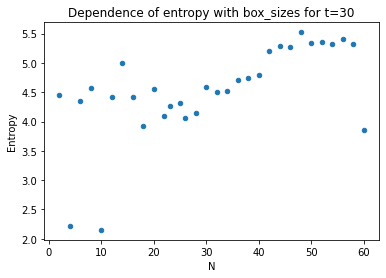

In [30]:
plt.scatter((10.0/9.0)*h_results[:,3], h_results[:,1], s=20)
plt.ylabel('Entropy')
plt.xlabel('N')
plt.title(f'Dependence of entropy with box_sizes for t={t}')
plt.savefig(f'Entropy_N_t_{t}.png')

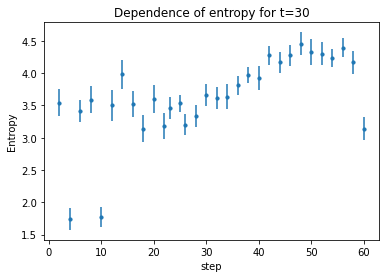

In [42]:
plt.scatter(h_results[:,0], h_results[:,1], s=10)
plt.errorbar(h_results[:,0], h_results[:,1], yerr=h_results[:,2], linestyle="None")
plt.ylabel(f'Entropy')
#plt.ylabel(f'Entropy/log(N)')
plt.xlabel(f'step')
plt.title(f'Dependence of entropy for t={t}')
plt.savefig(f'Entropy_{t}')

In [33]:
h_results

array([[3.60000000e+01, 4.71583913e+00, 8.88178420e-16, 9.00000000e+04],
       [2.80000000e+01, 4.13932666e+00, 0.00000000e+00, 9.00000000e+04],
       [3.40000000e+01, 4.51895954e+00, 0.00000000e+00, 9.00000000e+04],
       [2.30000000e+01, 4.26933222e+00, 8.88178420e-16, 9.00000000e+04],
       [2.00000000e+00, 4.45424613e+00, 8.88178420e-16, 9.00000000e+04],
       [2.60000000e+01, 4.05496041e+00, 8.88178420e-16, 9.00000000e+04],
       [6.00000000e+00, 4.34476690e+00, 0.00000000e+00, 9.00000000e+04],
       [1.80000000e+01, 3.91842352e+00, 4.44089210e-16, 9.00000000e+04],
       [5.40000000e+01, 5.31691725e+00, 0.00000000e+00, 9.00000000e+04],
       [5.00000000e+01, 5.34457563e+00, 0.00000000e+00, 9.00000000e+04],
       [1.20000000e+01, 4.42099831e+00, 0.00000000e+00, 9.00000000e+04],
       [5.60000000e+01, 5.40426613e+00, 0.00000000e+00, 9.00000000e+04],
       [8.00000000e+00, 4.57348643e+00, 0.00000000e+00, 9.00000000e+04],
       [4.80000000e+01, 5.52291173e+00, 8.88178420e

In [41]:
t=43

#Analysis with box sizes

n_steps = 50
h_results = np.zeros((n_steps,3))

box_size_rel = 0.10

step = 60

box_sizes = np.linspace(100, 200000, n_steps, dtype=int)

for n,box_size in enumerate(box_sizes):

    column = df[t][step].to_dict()
    index = df[t].index

    desampled = []
    for element in column:
        desampled.append([element for i in range(int(column[element]))])
    desampled = list(itertools.chain(*desampled))
    random.shuffle(desampled)
    
    #N = len(desampled)
    #box_size = int(box_size_rel * N)
    #box_size = 10000
    box_number = int(1 / box_size_rel)
    boxes = {}
    boxes_df = {}
    
    h = np.zeros(box_number)
    for i in range(box_number):
        boxes[i] = desampled[i*box_size : (i+1)*box_size]


    for i in range(box_number):
        df_x = pd.DataFrame([], columns = ['seq'])
        for j in range(box_number):
            if j != i:
                df_x = pd.concat([df_x, pd.DataFrame(boxes[j], columns= ['seq'])])
                
        boxes_df[i] = df_x.pivot_table(columns=['seq'], aggfunc='size')
        boxes_df[i] = pd.DataFrame(boxes_df[i], columns=['abundance'])
        boxes_df[i]['abundance_rel'] = boxes_df[i]['abundance'] / boxes_df[i]['abundance'].sum()
        p = np.array(boxes_df[i]['abundance_rel'].tolist())
        p = p[p.nonzero()]
        p_log = np.log2(p)
        p_h = -1.0*p*p_log
        h[i] = p_h.sum()    
    h_results[n][0] = box_size
    h_results[n][1] = h.mean()
    h_results[n][2] = h.std()

slope=-0.09879360295337035, intercept=-0.1475111124703981


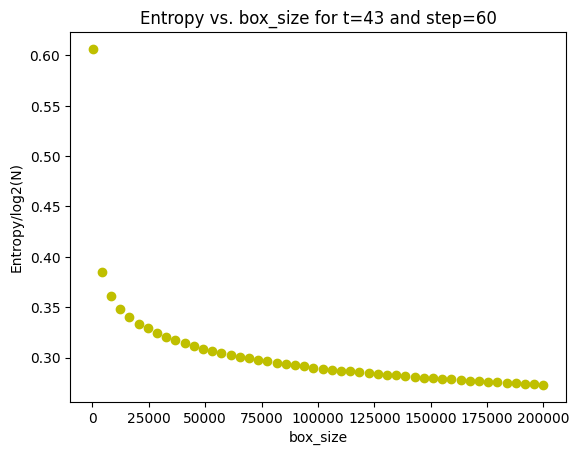

In [46]:
plt.figure()

coef = np.polyfit(np.log2(h_results[:,0]), np.log2(h_results[:,1]/np.log2(h_results[:,0])), 1)
print(f'slope={coef[0]}, intercept={coef[1]}')
#poly1d_fn = np.poly1d(coef) 

plt.plot(h_results[:,0], h_results[:,1]/np.log2(h_results[:,0]), 'yo')#,x, poly1d_fn(x), '--k')
plt.ylabel(f'Entropy/log2(N)')
plt.xlabel(f'box_size')
#plt.xscale('log')
#plt.yscale('log')
plt.title(f'Entropy vs. box_size for t={t} and step={step}')
plt.savefig(f'entropy_sizebox_{t}_{step}.png')

In [32]:
coef = np.polyfit(np.log2(h_results[:,0]), np.log2(h_results[:,1]/np.log2(h_results[:,0])), 1)
coef

array([-0.08596561, -0.02789879])

In [ ]:
# Check the total number of sequences in each step

In [27]:
datadict = {}
t=30
for element in df[t].columns:
    datadict[element] = int(df[t][element].sum())
    
dataf = pd.DataFrame.from_dict(datadict, orient='index', columns=['Total'])

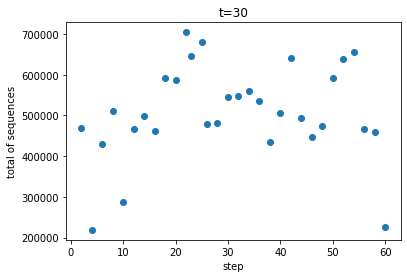

In [28]:
dataf.sort_values('Total', ascending=True)
plt.scatter(dataf.index.tolist(), dataf['Total'].tolist())
plt.ylabel('total of sequences')
plt.xlabel('step')
plt.title(f't={t}')
plt.savefig(f'total_sequences_{t}.png')